In [60]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
titanic_data=pd.read_csv("tested.csv")

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
titanic_data.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [8]:
categoricalcolumns=['Sex','Embarked']

In [9]:
#now we will handle the nullvalues
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

there are many ways to handle the null values 
 as our dataset has only 419 entries the best way is to use imputation with simple methods
we can use mean median or mode impetutation based on our data 
we will use mean method for age and we will drop the cabin column from our dataset

In [11]:
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)

In [14]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
titanic_data['Fare'].fillna(titanic_data['Fare'].median(),inplace=True)

In [16]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [19]:
#now for cabin
titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [20]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [21]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#Finding the number of peaople survived and not survived

In [22]:
titanic_data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

Data Visulization

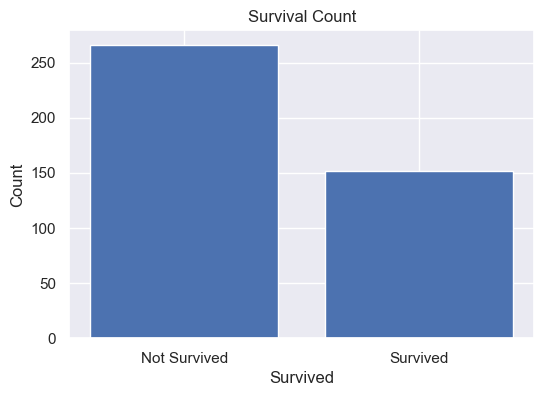

In [29]:
#making a count plot for survived column
survived_counts = titanic_data['Survived'].value_counts()

# Plot the count plot
plt.figure(figsize=(6, 4))
plt.bar(survived_counts.index, survived_counts.values)
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.xticks(survived_counts.index, ['Not Survived', 'Survived'])  # Label the x-axis ticks
plt.show()



In [30]:
#now checking which gender survived


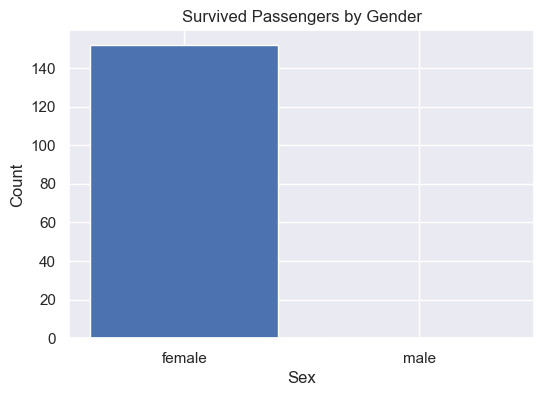

In [35]:
# Filter the data for passengers who survived
survived_data = titanic_data[titanic_data['Survived'] == 1]

# Count the number of males and females who survived
gender_counts = survived_data['Sex'].value_counts()

# Create a bar plot for the count of males and females who survived
plt.figure(figsize=(6, 4))
plt.bar(['female', 'male'], [gender_counts.get('female', 0), gender_counts.get('male', 0)])
plt.title("Survived Passengers by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

Here we can see that the number of men who survived is 0 and only female passengers survived
Now we will check Pclass

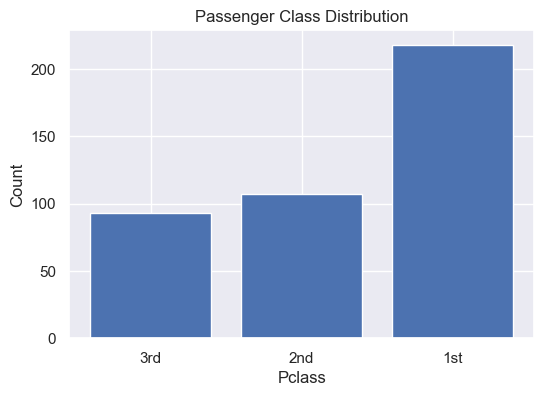

In [36]:

# Create a count plot for passenger classes
plt.figure(figsize=(6, 4))
plt.bar(titanic_data['Pclass'].unique(), titanic_data['Pclass'].value_counts())
plt.title("Passenger Class Distribution")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.xticks(titanic_data['Pclass'].unique(), ['1st', '2nd', '3rd'])  # Label the x-axis ticks
plt.show()

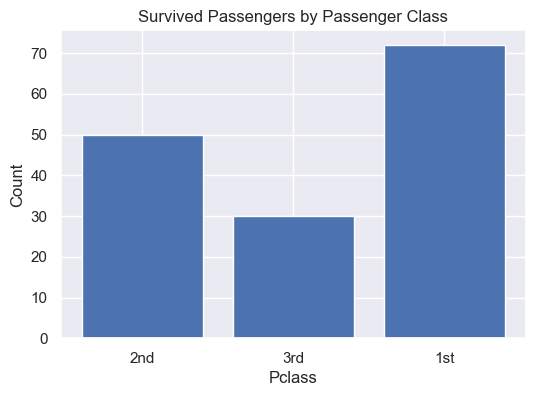

In [38]:
#now we will find the no. of peaople survived based on Pclass
# Filter the data for passengers who survived
survived_data = titanic_data[titanic_data['Survived'] == 1]

# Create a count plot for survived passengers based on their passenger class
plt.figure(figsize=(6, 4))
plt.bar(survived_data['Pclass'].unique(), survived_data['Pclass'].value_counts())
plt.title("Survived Passengers by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.xticks(survived_data['Pclass'].unique(), ['1st', '2nd', '3rd'])  # Label the x-axis ticks
plt.show()






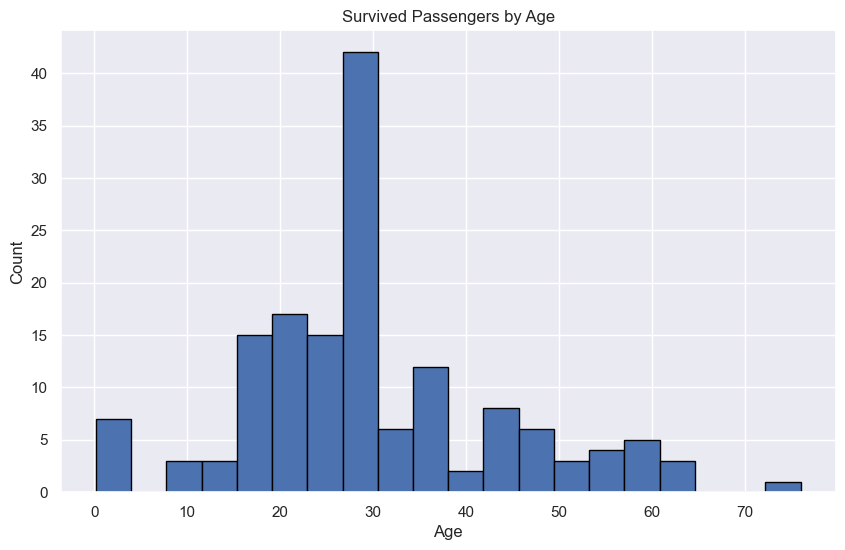

In [39]:
#now we will find based on age group
# Filter the data for passengers who survived
survived_data = titanic_data[titanic_data['Survived'] == 1]

# Create a count plot for survived passengers based on their ages
plt.figure(figsize=(10, 6))
plt.hist(survived_data['Age'], bins=20, edgecolor='black')
plt.title("Survived Passengers by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

As we can see there are people with age 0 who survived and that is not possible so we will remove them 

We will see survival rate based on Embarked location now

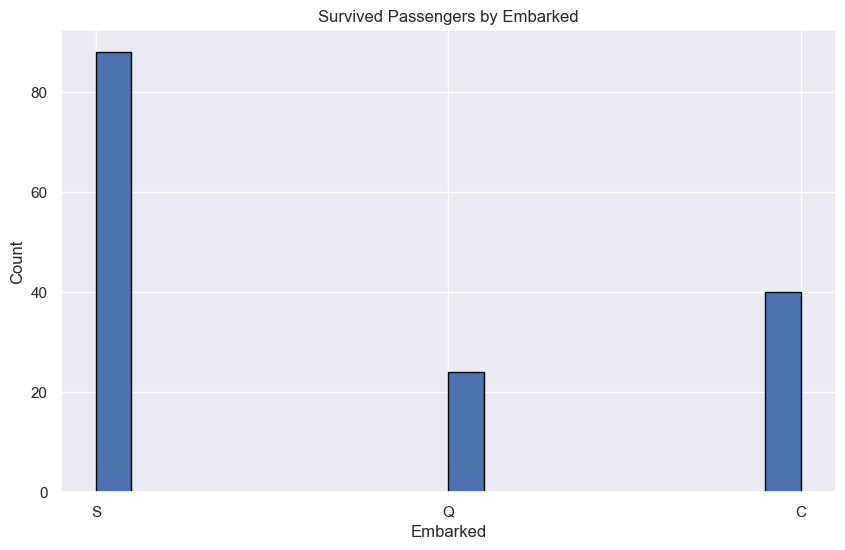

In [40]:
# Filter the data for passengers who survived
survived_data = titanic_data[titanic_data['Survived'] == 1]

# Create a count plot for survived passengers based on their ages
plt.figure(figsize=(10, 6))
plt.hist(survived_data['Embarked'], bins=20, edgecolor='black')
plt.title("Survived Passengers by Embarked")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()

Survivsl rate was higher from S as compared to Q and C

In [45]:
#Removing people with Age 0



# Drop rows where the age is less than 1
titanic_data = titanic_data[titanic_data['Age'] >= 1]
titanic_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1101.374372,0.374372,2.243719,29.987437,0.437186,0.384422,36.051194
std,120.941262,0.484569,0.844838,12.375825,0.830662,0.988834,56.313138
min,893.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1101.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.456250
75%,1206.750000,1.000000,3.000000,36.000000,1.000000,0.000000,31.634400
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Now we will convert the categorical values to numerical values

In [46]:
categoricalcolumns

['Sex', 'Embarked']

In [50]:
#we will encode the Sex col like 0 for female and 1 will be for male
titanic_data['Sex'].value_counts()

Sex
male      249
female    149
Name: count, dtype: int64

In [49]:
#we will chanee C with 0 S with 1 and  with 2

titanic_data['Embarked'].value_counts()

Embarked
S    257
C     97
Q     44
Name: count, dtype: int64

In [52]:
titanic_data['Sex'] = titanic_data['Sex'].replace({'male': 1, 'female': 0})


In [53]:
titanic_data['Embarked'] = titanic_data['Embarked'].replace({'C': 0, 'S': 1,'Q':2})


In [54]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,1
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,1
5,897,0,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,1


We have done the encoding as you can see above

Splitting the features and the labels

In [56]:
X= titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=titanic_data['Survived']

In [57]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1
5,3,1,14.0,0,0,9.2250,1
...,...,...,...,...,...,...,...
412,3,0,28.0,0,0,7.7750,1
413,3,1,27.0,0,0,8.0500,1
414,1,0,39.0,0,0,108.9000,0
416,3,1,27.0,0,0,8.0500,1


In [58]:
Y

1      1
2      0
3      0
4      1
5      0
      ..
412    1
413    0
414    1
416    0
417    0
Name: Survived, Length: 398, dtype: int64

Train and test split 

In [62]:
#using 60/40 % for the split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=42)

In [69]:
print(X.shape , X_train.shape,X_test.shape)


(398, 7) (238, 7) (160, 7)


In [70]:
print(Y.shape , Y_train.shape,Y_test.shape)

(398,) (238,) (160,)


Model Training

Using Logistic Regression model 
in thid model we have a sigmoid function it has a formula
y=1/1+e^-z
where 
z=w.X+b

X= input features
y= prediction probability
w= weights
b= biases

In [71]:
from sklearn.linear_model import LogisticRegression


In [72]:
model = LogisticRegression()  #LOADING INSTANCE


Training the model with training data

In [73]:
model.fit(X_train,Y_train)

LogisticRegression()

Evaluateing the model

Using accuracy score

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
#accuracy on training data

X_train_prediction=model.predict(X_train)

In [77]:
print(X_train_prediction)

[0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0
 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1
 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0]


In [79]:
#now comparing with the original values

training_accuracy=accuracy_score(Y_train,X_train_prediction)
print("Accuracy score of the training  data : ",training_accuracy)

Accuracy score of the training  data :  1.0


In [80]:
# now evaluate using test data

X_test_prediction=model.predict(X_test)
print(X_test_prediction)

[0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 1 0 0 0 1 1 0]


In [81]:
testing_accuracy=accuracy_score(Y_test,X_test_prediction)
print("Accuracy score of the test  data : ",testing_accuracy)

Accuracy score of the test  data :  1.0
